In [1]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
%matplotlib inline


## hello world

In [2]:
# load dataset
finance_database= pd.read_csv("C:/Users/Asus/Desktop/DataSet/finance_train.csv")
finance_database.head()


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment.Tax.Saving.Bond,Home.Loan,Online.Purchase.Amount,Revenue.Grid,gender,region,Investment.in.Commudity,Investment.in.Equity,Investment.in.Derivative,Portfolio.Balance
0,2148,1,45-50,Partner,Professional,Professional,Rent Privately,">=35,000",Yes,Yes,...,7.49,2.48,0.0,2,Female,South West,65.87,9.27,30.93,87.48
1,8099,1,61-65,Partner,Retired,Retired,Own Home,"<12,500, >=10,000",No,No,...,0.00,3.99,0.0,2,Female,Unknown,42.46,4.49,26.23,110.73
2,6611,3,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.0,2,Male,East Anglia,75.38,0.00,26.66,127.57
3,1950,Zero,55-60,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,2.00,0.00,0.0,2,Female,North West,34.78,6.91,29.24,33.79
4,10857,2,51-55,Partner,Manual Worker,Manual Worker,Own Home,"<27,500, >=25,000",Yes,Yes,...,0.00,0.00,0.0,2,Female,South West,48.58,9.58,20.65,56.17


In [3]:
#removing of columns with unique elements 
finance_database.drop(['REF_NO','year_last_moved','post_code','post_area' ],axis=1,inplace=True)


In [4]:
finance_database.head()
finance_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         8124 non-null   object 
 1   age_band                         8124 non-null   object 
 2   status                           8124 non-null   object 
 3   occupation                       8124 non-null   object 
 4   occupation_partner               8124 non-null   object 
 5   home_status                      8124 non-null   object 
 6   family_income                    8124 non-null   object 
 7   self_employed                    8124 non-null   object 
 8   self_employed_partner            8124 non-null   object 
 9   TVarea                           8124 non-null   object 
 10  Average.Credit.Card.Transaction  8124 non-null   float64
 11  Balance.Transfer                 8124 non-null   float64
 12  Term.Deposit        

In [5]:
#cleaning of data
finance_database['children'] = finance_database['children'].str.replace('Zero', '0').str.replace('+','')
finance_database.head(919)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11920\1166935675.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  finance_database['children'] = finance_database['children'].str.replace('Zero', '0').str.replace('+','')


,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,...,Investment.Tax.Saving.Bond,Home.Loan,Online.Purchase.Amount,Revenue.Grid,gender,region,Investment.in.Commudity,Investment.in.Equity,Investment.in.Derivative,Portfolio.Balance
0,1,45-50,Partner,Professional,Professional,Rent Privately,">=35,000",Yes,Yes,HTV,...,7.49,2.48,0.00,2,Female,South West,65.87,9.27,30.93,87.48
1,1,61-65,Partner,Retired,Retired,Own Home,"<12,500, >=10,000",No,No,Unknown,...,0.00,3.99,0.00,2,Female,Unknown,42.46,4.49,26.23,110.73
2,3,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,Anglia,...,0.00,0.00,0.00,2,Male,East Anglia,75.38,0.00,26.66,127.57
3,0,55-60,Partner,Professional,Professional,Own Home,">=35,000",No,No,Granada,...,2.00,0.00,0.00,2,Female,North West,34.78,6.91,29.24,33.79
4,2,51-55,Partner,Manual Worker,Manual Worker,Own Home,"<27,500, >=25,000",Yes,Yes,TV South West,...,0.00,0.00,0.00,2,Female,South West,48.58,9.58,20.65,56.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,2,45-50,Partner,Professional,Secretarial/Admin,Own Home,">=35,000",No,No,Carlton,...,12.96,5.73,15.48,2,Male,South East,37.19,15.69,12.32,112.43
915,1,22-25,Partner,Unknown,Professional,Own Home,">=35,000",Yes,No,Carlton,...,0.00,0.00,0.00,2,Female,North West,30.08,20.49,39.72,102.20
916,4,41-45,Partner,Business Manager,Housewife,Own Home,">=35,000",Yes,No,Meridian,...,0.00,0.00,0.00,2,Male,North West,43.13,9.22,22.02,37.09
917,0,71+,Partner,Retired,Retired,Own Home,"<12,500, >=10,000",No,No,Yorkshire,...,0.00,0.00,0.00,2,Female,East Midlands,0.00,7.58,7.58,75.01


In [6]:
finance_database['children'] = finance_database['children'].astype(float)

In [7]:
finance_database['age_band']=finance_database['age_band'].str.replace('+','-75')
#finance_database['age_band_min','age_band_max']=finance_database['age_band'].str.split('-', expand=True)
finance_database['age_band']

C:\Users\Asus\AppData\Local\Temp\ipykernel_11920\2411392950.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  finance_database['age_band']=finance_database['age_band'].str.replace('+','-75')


0       45-50
1       61-65
2       31-35
3       55-60
4       51-55
        ...  
8119    71-75
8120    61-65
8121    61-65
8122    26-30
8123    51-55
Name: age_band, Length: 8124, dtype: object

In [8]:
finance_database['age_band']=finance_database['age_band'].str.replace('Unknown','0-0')

In [9]:
finance_database['age_band_min']=finance_database['age_band'].str.split('-', expand=True)[0].astype(float)
finance_database['age_band_max']=finance_database['age_band'].str.split('-', expand=True)[1].astype(float)

In [10]:
finance_database['age_band_mean'] = (finance_database['age_band_min'] + finance_database['age_band_max']) / 2
finance_database.drop(['age_band','age_band_min','age_band_max' ],axis=1,inplace=True)
finance_database.head(20)

,children,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,Average.Credit.Card.Transaction,...,Home.Loan,Online.Purchase.Amount,Revenue.Grid,gender,region,Investment.in.Commudity,Investment.in.Equity,Investment.in.Derivative,Portfolio.Balance,age_band_mean
0,1.0,Partner,Professional,Professional,Rent Privately,">=35,000",Yes,Yes,HTV,0.00,...,2.48,0.00,2,Female,South West,65.87,9.27,30.93,87.48,47.5
1,1.0,Partner,Retired,Retired,Own Home,"<12,500, >=10,000",No,No,Unknown,0.00,...,3.99,0.00,2,Female,Unknown,42.46,4.49,26.23,110.73,63.0
2,3.0,Partner,Professional,Professional,Own Home,">=35,000",No,No,Anglia,119.98,...,0.00,0.00,2,Male,East Anglia,75.38,0.00,26.66,127.57,33.0
3,0.0,Partner,Professional,Professional,Own Home,">=35,000",No,No,Granada,0.00,...,0.00,0.00,2,Female,North West,34.78,6.91,29.24,33.79,57.5
4,2.0,Partner,Manual Worker,Manual Worker,Own Home,"<27,500, >=25,000",Yes,Yes,TV South West,0.00,...,0.00,0.00,2,Female,South West,48.58,9.58,20.65,56.17,53.0
5,2.0,Partner,Professional,Professional,Own Home,"<25,000, >=22,500",No,No,Tyne Tees,0.00,...,7.46,7.98,1,Male,North,77.47,38.37,85.35,200.23,33.0
6,3.0,Partner,Secretarial/Admin,Unknown,Own Home,"<25,000, >=22,500",Yes,Yes,Grampian,0.00,...,37.44,31.97,2,Female,Scotland,14.49,109.42,109.93,177.31,38.0
7,1.0,Partner,Other,Professional,Own Home,"<15,000, >=12,500",No,No,Yorkshire,200.44,...,2.99,0.00,2,Female,Unknown,161.69,54.87,98.65,306.17,43.0
8,2.0,Partner,Secretarial/Admin,Manual Worker,Own Home,"<17,500, >=15,000",No,No,Central,9.99,...,7.48,0.00,2,Female,West Midlands,2.00,1.25,0.00,46.31,28.0
9,3.0,Partner,Business Manager,Manual Worker,Own Home,"<27,500, >=25,000",No,No,Meridian,0.00,...,0.00,0.00,2,Female,South West,55.19,10.24,24.41,53.09,33.0


In [11]:
def data_encode(col):
    categories=finance_database[col].unique()
    cat=categories.tolist()
    a=[]
    for i in range(len(cat)):
        a.append(i)
    cat_dict = dict(zip(cat, a))
    finance_database[col].replace(cat_dict , inplace=True)
    return finance_database.head(20)
for i in ['status','occupation','occupation_partner','home_status','self_employed','self_employed_partner','TVarea','gender','region']:
    a=data_encode(i)
print(a)

    children  status  occupation  occupation_partner  home_status  \
0        1.0       0           0                   0            0   
1        1.0       0           1                   1            1   
2        3.0       0           0                   0            1   
3        0.0       0           0                   0            1   
4        2.0       0           2                   2            1   
5        2.0       0           0                   0            1   
6        3.0       0           3                   3            1   
7        1.0       0           4                   0            1   
8        2.0       0           3                   2            1   
9        3.0       0           5                   2            1   
10       3.0       0           6                   4            1   
11       2.0       0           3                   3            1   
12       1.0       0           2                   3            1   
13       1.0       1           0  

In [12]:
# replace special character to integer 
finance_database['family_income']=finance_database['family_income'].str.replace('<','').str.replace(',','').str.replace(' ','')
finance_database['family_income']



#seperate the '-' and pull the minimum and maximum values
finance_database['family_income_min']=finance_database['family_income'].str.split('>=', expand=True)[0]
finance_database['family_income_max']=finance_database['family_income'].str.split('>=', expand=True)[1]
finance_database['family_income_min'].value_counts()
finance_database['family_income_max'].value_counts()
finance_database.head()
finance_database.info()

#this code will convert the string value into null value and change the datatype into float or numeric
finance_database.family_income_min=pd.to_numeric(finance_database.family_income_min,errors='coerce')
finance_database.family_income_max=pd.to_numeric(finance_database.family_income_max,errors='coerce')

finance_database.isnull().sum()

tempMedian=finance_database.loc[:,"family_income_min"].median()
finance_database["family_income_min"].fillna(tempMedian,inplace=True)

tempMedian=finance_database.loc[:,"family_income_max"].median()
finance_database["family_income_max"].fillna(tempMedian,inplace=True)

finance_database.isnull().sum()



#Find the  mean values of each row 'family_income'

finance_database['family_income_mean'] = (finance_database['family_income_min'] + finance_database['family_income_max']) / 2
finance_database.drop(['family_income','family_income_min','family_income_max'],axis=1,inplace=True)
finance_database['family_income_mean'].value_counts()

finance_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         8124 non-null   float64
 1   status                           8124 non-null   int64  
 2   occupation                       8124 non-null   int64  
 3   occupation_partner               8124 non-null   int64  
 4   home_status                      8124 non-null   int64  
 5   family_income                    8124 non-null   object 
 6   self_employed                    8124 non-null   int64  
 7   self_employed_partner            8124 non-null   int64  
 8   TVarea                           8124 non-null   int64  
 9   Average.Credit.Card.Transaction  8124 non-null   float64
 10  Balance.Transfer                 8124 non-null   float64
 11  Term.Deposit                     8124 non-null   float64
 12  Life.Insurance      

In [13]:
finance_database.describe()

,children,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,TVarea,Average.Credit.Card.Transaction,Balance.Transfer,...,Online.Purchase.Amount,Revenue.Grid,gender,region,Investment.in.Commudity,Investment.in.Equity,Investment.in.Derivative,Portfolio.Balance,age_band_mean,family_income_mean
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.642787,0.442024,2.624815,2.357706,1.041359,0.929591,0.887740,6.537174,23.712283,47.029445,...,18.699473,1.893772,0.250862,4.750862,37.017043,21.678456,32.158424,90.940603,46.313146,21246.245692
std,0.915712,0.894379,2.328929,1.915888,0.375952,0.255850,0.315705,3.524972,51.456067,80.366394,...,87.276149,0.308149,0.441415,3.035506,43.397160,32.192897,40.317897,110.120649,13.889330,7082.561126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,0.000000,6000.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,3.000000,8.390000,4.580000,8.660000,26.427500,33.000000,15625.000000
50%,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,8.000000,0.000000,17.980000,...,0.000000,2.000000,0.000000,5.000000,24.090000,12.820000,21.480000,65.985000,47.500000,23750.000000
75%,1.000000,0.000000,5.000000,3.000000,1.000000,1.000000,1.000000,9.000000,23.980000,67.975000,...,7.490000,2.000000,0.000000,8.000000,51.272500,28.470000,43.085000,125.985000,57.500000,27500.000000
max,4.000000,4.000000,8.000000,8.000000,4.000000,1.000000,1.000000,13.000000,662.260000,2951.760000,...,4306.420000,2.000000,2.000000,12.000000,1231.090000,1279.100000,1771.160000,4283.560000,73.000000,28750.000000


continuousVars = finance_database.columns[finance_database.dtypes != object]

continuousVars
from matplotlib.pyplot import figure
from matplotlib.backends.backend_pdf import PdfPages
fileName = "C:/Users/Asus/Desktop/continous_boxpltbefore.pdf"
pdf = PdfPages(fileName)
for colNumber, colName in enumerate(continuousVars): # enumerate gives key, value pair
    print(colNumber, colName)
    figure()
    sns.boxplot(y = finance_database[colName], x = finance_database["Revenue.Grid"])
    pdf.savefig(colNumber+1) # colNumber+1 is done to ensure page numbering starts from 1 (and NOT 0)
pdf.close()

In [14]:
finance_database.shape

(8124, 28)

# detect and remove outliers using Isolation Forest algorithm
clf = IsolationForest(n_estimators=100, random_state=42)
clf.fit(finance_database)
outlier_index = clf.predict(finance_database) == -1
finance_database = finance_database[~outlier_index]

In [15]:
finance_database.describe()

,children,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,TVarea,Average.Credit.Card.Transaction,Balance.Transfer,...,Online.Purchase.Amount,Revenue.Grid,gender,region,Investment.in.Commudity,Investment.in.Equity,Investment.in.Derivative,Portfolio.Balance,age_band_mean,family_income_mean
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.642787,0.442024,2.624815,2.357706,1.041359,0.929591,0.887740,6.537174,23.712283,47.029445,...,18.699473,1.893772,0.250862,4.750862,37.017043,21.678456,32.158424,90.940603,46.313146,21246.245692
std,0.915712,0.894379,2.328929,1.915888,0.375952,0.255850,0.315705,3.524972,51.456067,80.366394,...,87.276149,0.308149,0.441415,3.035506,43.397160,32.192897,40.317897,110.120649,13.889330,7082.561126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,0.000000,6000.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,3.000000,8.390000,4.580000,8.660000,26.427500,33.000000,15625.000000
50%,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,8.000000,0.000000,17.980000,...,0.000000,2.000000,0.000000,5.000000,24.090000,12.820000,21.480000,65.985000,47.500000,23750.000000
75%,1.000000,0.000000,5.000000,3.000000,1.000000,1.000000,1.000000,9.000000,23.980000,67.975000,...,7.490000,2.000000,0.000000,8.000000,51.272500,28.470000,43.085000,125.985000,57.500000,27500.000000
max,4.000000,4.000000,8.000000,8.000000,4.000000,1.000000,1.000000,13.000000,662.260000,2951.760000,...,4306.420000,2.000000,2.000000,12.000000,1231.090000,1279.100000,1771.160000,4283.560000,73.000000,28750.000000


<Axes: >

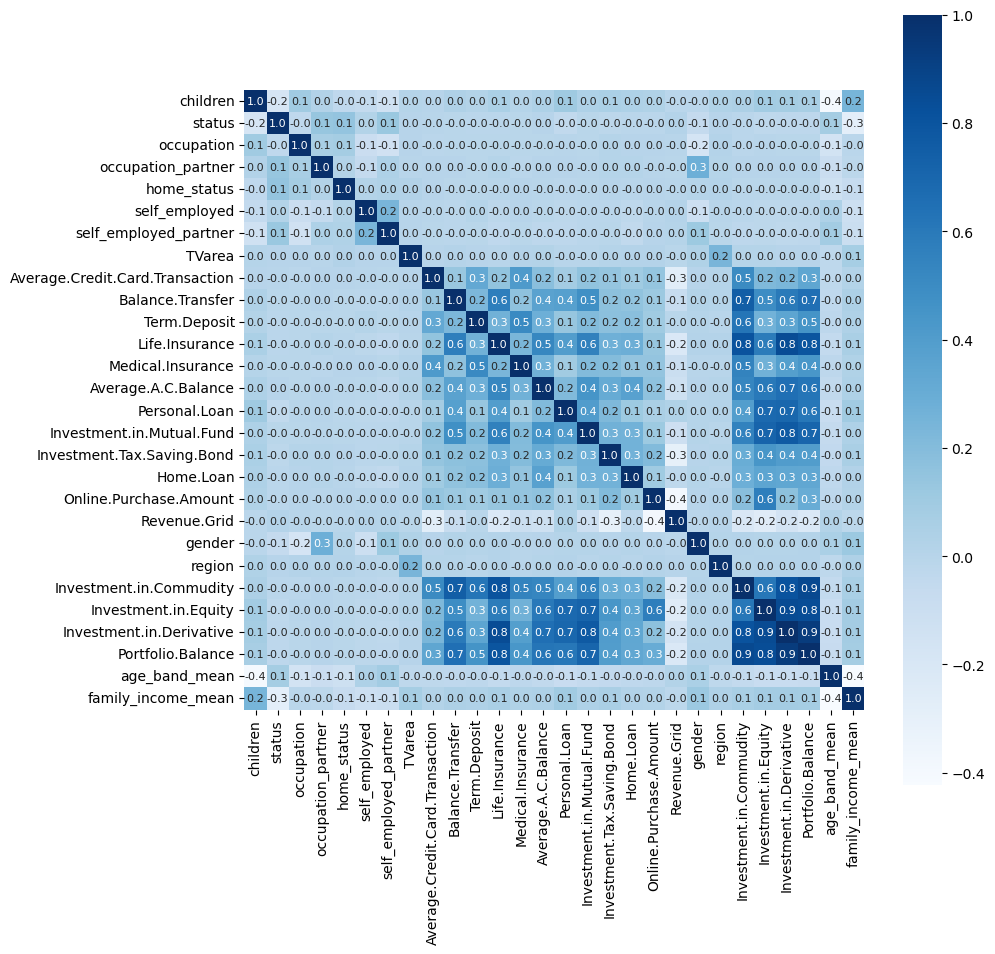

In [16]:
corr=finance_database.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

continuousVars = finance_database.columns[finance_database.dtypes != object]

continuousVars
from matplotlib.pyplot import figure
from matplotlib.backends.backend_pdf import PdfPages
fileName = "C:/Users/Asus/Desktop/continous_boxplt.pdf"
pdf = PdfPages(fileName)
for colNumber, colName in enumerate(continuousVars): # enumerate gives key, value pair
    print(colNumber, colName)
    figure()
    sns.boxplot(y = finance_database[colName], x = finance_database["Revenue.Grid"])
    pdf.savefig(colNumber+1) # colNumber+1 is done to ensure page numbering starts from 1 (and NOT 0)
pdf.close()

In [17]:
finance_database.shape


(8124, 28)

In [18]:
col = finance_database.columns.tolist()
for i in col:
    corr = finance_database[i].corr(finance_database["Revenue.Grid"])
    print("Correlation coefficient between",i,"and Revenue.Grid:", corr)

Correlation coefficient between children and Revenue.Grid: -0.01102694335549675
Correlation coefficient between status and Revenue.Grid: 0.013162208367272764
Correlation coefficient between occupation and Revenue.Grid: -0.000820708773730118
Correlation coefficient between occupation_partner and Revenue.Grid: -0.007360865312114899
Correlation coefficient between home_status and Revenue.Grid: -0.004577092518344886
Correlation coefficient between self_employed and Revenue.Grid: 0.012862438492808203
Correlation coefficient between self_employed_partner and Revenue.Grid: 0.010274911469110613
Correlation coefficient between TVarea and Revenue.Grid: -0.005487610181035485
Correlation coefficient between Average.Credit.Card.Transaction and Revenue.Grid: -0.2629914250353803
Correlation coefficient between Balance.Transfer and Revenue.Grid: -0.07455877288433031
Correlation coefficient between Term.Deposit and Revenue.Grid: -0.006385180708179736
Correlation coefficient between Life.Insurance and R

from statsmodels.stats.outliers_influence import variance_inflation_factor
tempMaxVIF = 5 # The VIF that will be calculated at EVERY iteration in while loop
maxVIFCutoff = 5 # 5 is recommended cutoff value for linear regression
trainXCopy = x.copy()
counter = 1
highVIFColumnNames = []
while (tempMaxVIF >= maxVIFCutoff):
    
    print(counter)
    
    # Create an empty temporary df to store VIF values
    tempVIFDf = pd.DataFrame()
    
    # Calculate VIF using list comprehension
    tempVIFDf['VIF'] = [variance_inflation_factor(trainXCopy.values, i) for i in range(trainXCopy.shape[1])]
    
    # Create a new column "Column_Name" to store the col names against the VIF values from list comprehension
    tempVIFDf['Column_Name'] = trainXCopy.columns
    
    # Drop NA rows from the df - If there is some calculation error resulting in NAs
    tempVIFDf.dropna(inplace=True)
    
    # Sort the df based on VIF values, then pick the top most column name (which has the highest VIF)
    tempColumnName = tempVIFDf.sort_values(["VIF"], ascending = False).iloc[0,1]
    # tempColumnName = tempVIFDf.sort_values(["VIF"], ascending = True)[-1:]["Column_Name"].values[0]
    
    # Store the max VIF value in tempMaxVIF
    tempMaxVIF = tempVIFDf.sort_values(["VIF"], ascending = False).iloc[0,0]
    # tempMaxVIF = tempVIFDf.sort_values(["VIF"])[-1:]["VIF"].values[0]
    
    print(tempColumnName) 
    if (tempMaxVIF >= maxVIFCutoff): # This condition will ensure that columns having VIF lower than 5 are NOT dropped
        
        # Remove the highest VIF valued "Column" from trainXCopy. As the loop continues this step will keep removing highest VIF columns one by one 
        trainXCopy = trainXCopy.drop(tempColumnName, axis = 1)    
        highVIFColumnNames.append(tempColumnName)
    
    counter = counter + 1


In [33]:
X=finance_database.drop('Revenue.Grid', axis=1)
y=finance_database['Revenue.Grid']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10000, random_state=42,n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=42)

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score #0.97
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9643150123051681


In [36]:
from sklearn.metrics import classification_report

# Classification Model Validation
Confusion_Mat = pd.crosstab(y_test, y_pred)
print(Confusion_Mat) # R, C format (Actual = testY, Predicted = Test_Pred)

# Validation on Testset
print(classification_report(y_test, y_pred)) # Actual, Predicted

col_0           1     2
Revenue.Grid           
1             183    76
2              11  2168
              precision    recall  f1-score   support

           1       0.94      0.71      0.81       259
           2       0.97      0.99      0.98      2179

    accuracy                           0.96      2438
   macro avg       0.95      0.85      0.89      2438
weighted avg       0.96      0.96      0.96      2438



from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(C=1),
    X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Testing accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
finance_database.head()

,children,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,TVarea,Average.Credit.Card.Transaction,Balance.Transfer,...,Online.Purchase.Amount,Revenue.Grid,gender,region,Investment.in.Commudity,Investment.in.Equity,Investment.in.Derivative,Portfolio.Balance,age_band_mean,family_income_mean
0,1.0,0,0,0,0,0,0,0,0.00,0.00,...,0.0,2,0,0,65.87,9.27,30.93,87.48,47.5,27500.0
1,1.0,0,1,1,1,1,1,1,0.00,77.89,...,0.0,2,0,1,42.46,4.49,26.23,110.73,63.0,11250.0
2,3.0,0,0,0,1,1,1,2,119.98,0.00,...,0.0,2,1,2,75.38,0.00,26.66,127.57,33.0,27500.0
3,0.0,0,0,0,1,1,1,3,0.00,39.99,...,0.0,2,0,3,34.78,6.91,29.24,33.79,57.5,27500.0
4,2.0,0,2,2,1,0,0,4,0.00,161.47,...,0.0,2,0,0,48.58,9.58,20.65,56.17,53.0,26250.0


In [24]:
finance_database['family_income_mean'].describe()

count     8124.000000
mean     21246.245692
std       7082.561126
min       6000.000000
25%      15625.000000
50%      23750.000000
75%      27500.000000
max      28750.000000
Name: family_income_mean, dtype: float64

from dataprep.eda import create_report
create_report(finance_database)


In [25]:
import pickle


In [26]:
pickle.dump(model,open("finace_predictor.pkl",'wb'))

In [27]:
finance_database.to_csv("cleanDf.csv")